### Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loads the dataset.
df = pd.read_csv('2019.csv')

# Overview of the 5 first lines of the dataset.
print("Dataset head:\n", df.head().T) # Transposed for better readability.

Dataset head:
                                     0        1       2        3            4
Overall rank                        1        2       3        4            5
Country or region             Finland  Denmark  Norway  Iceland  Netherlands
Score                           7.769      7.6   7.554    7.494        7.488
GDP per capita                   1.34    1.383   1.488     1.38        1.396
Social support                  1.587    1.573   1.582    1.624        1.522
Healthy life expectancy         0.986    0.996   1.028    1.026        0.999
Freedom to make life choices    0.596    0.592   0.603    0.591        0.557
Generosity                      0.153    0.252   0.271    0.354        0.322
Perceptions of corruption       0.393     0.41   0.341    0.118        0.298


In [2]:
# Overview of the number of entries and the characteristics of each column.
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [3]:
# Summary of the statistics for numerical data.
print("\nSummary statistics for numerical data:")
df.describe()


Summary statistics for numerical data:


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [4]:
# Checking for missing values.
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


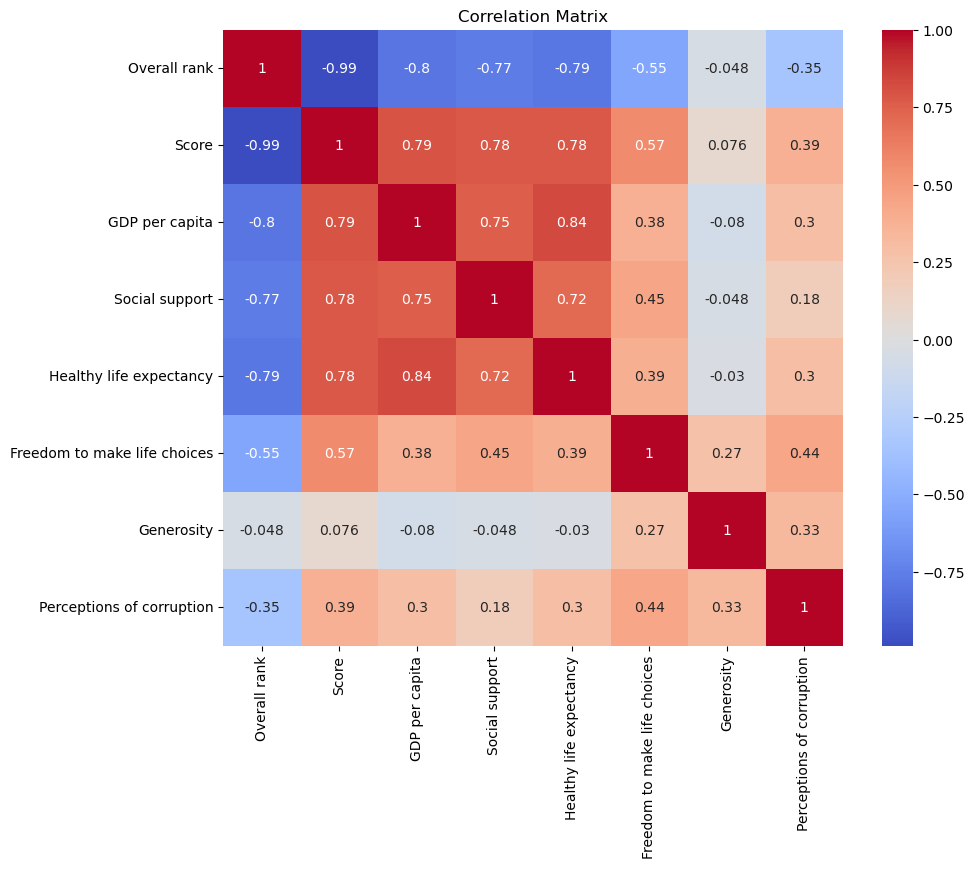

In [5]:
# Correlation analysis adjusted to exclude non-numeric columns.
numeric_df = df.select_dtypes(include=[np.number])  # This selects only the numeric columns.
correlation_matrix = numeric_df.corr()  # Generates the matrix over only the numeric features.

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

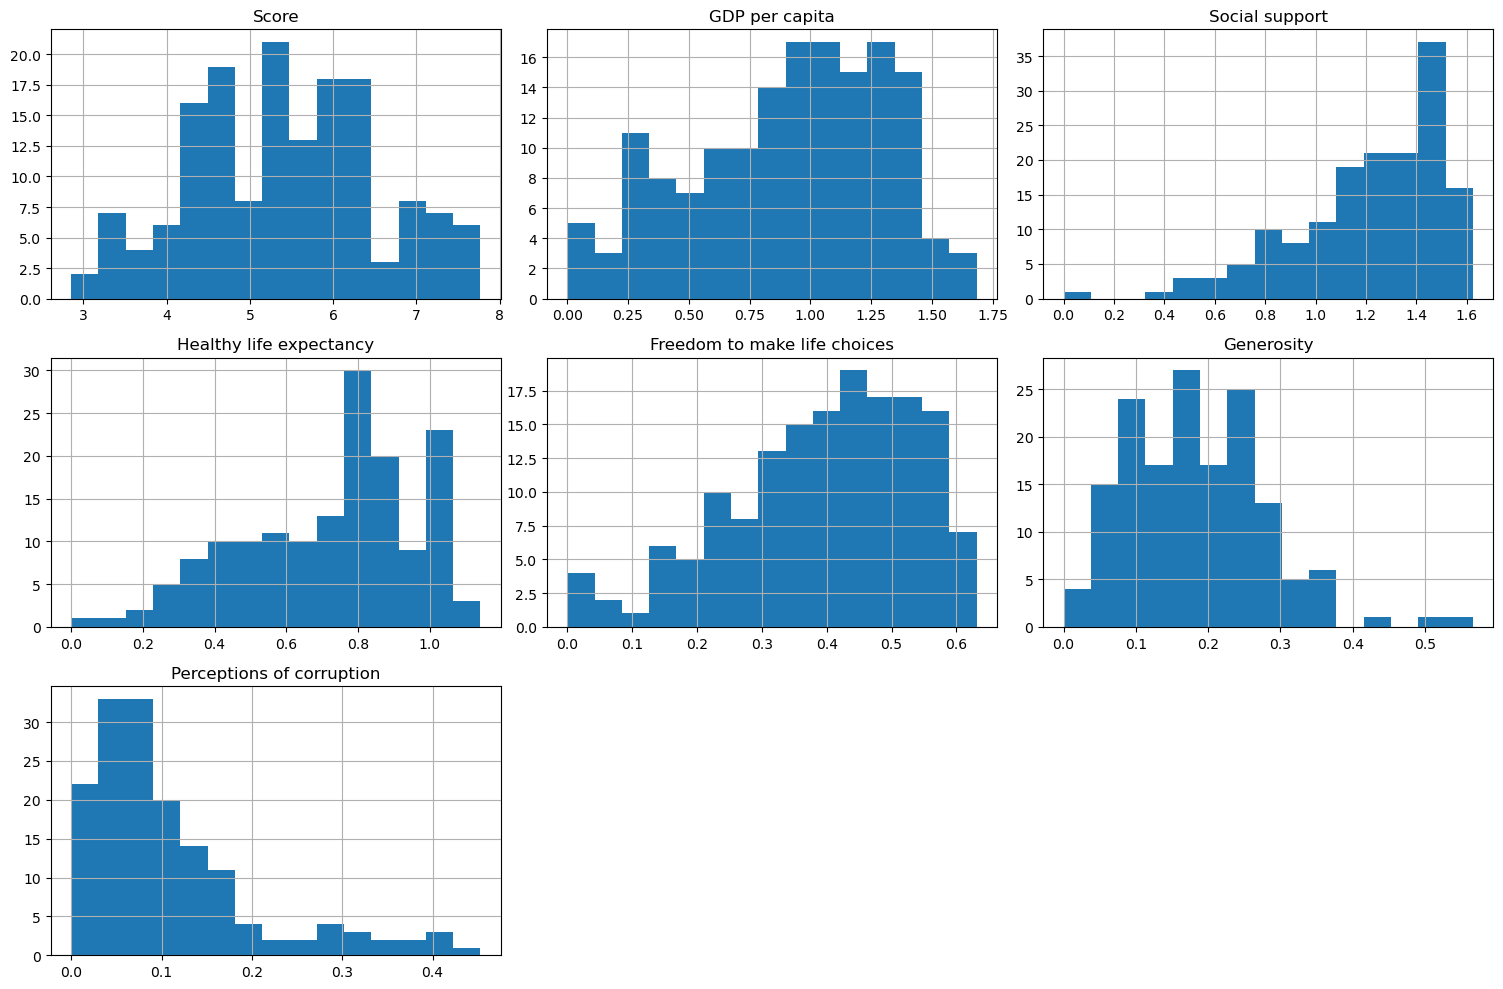

In [6]:
# Histograms of each variable.
df.drop(columns='Overall rank').hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

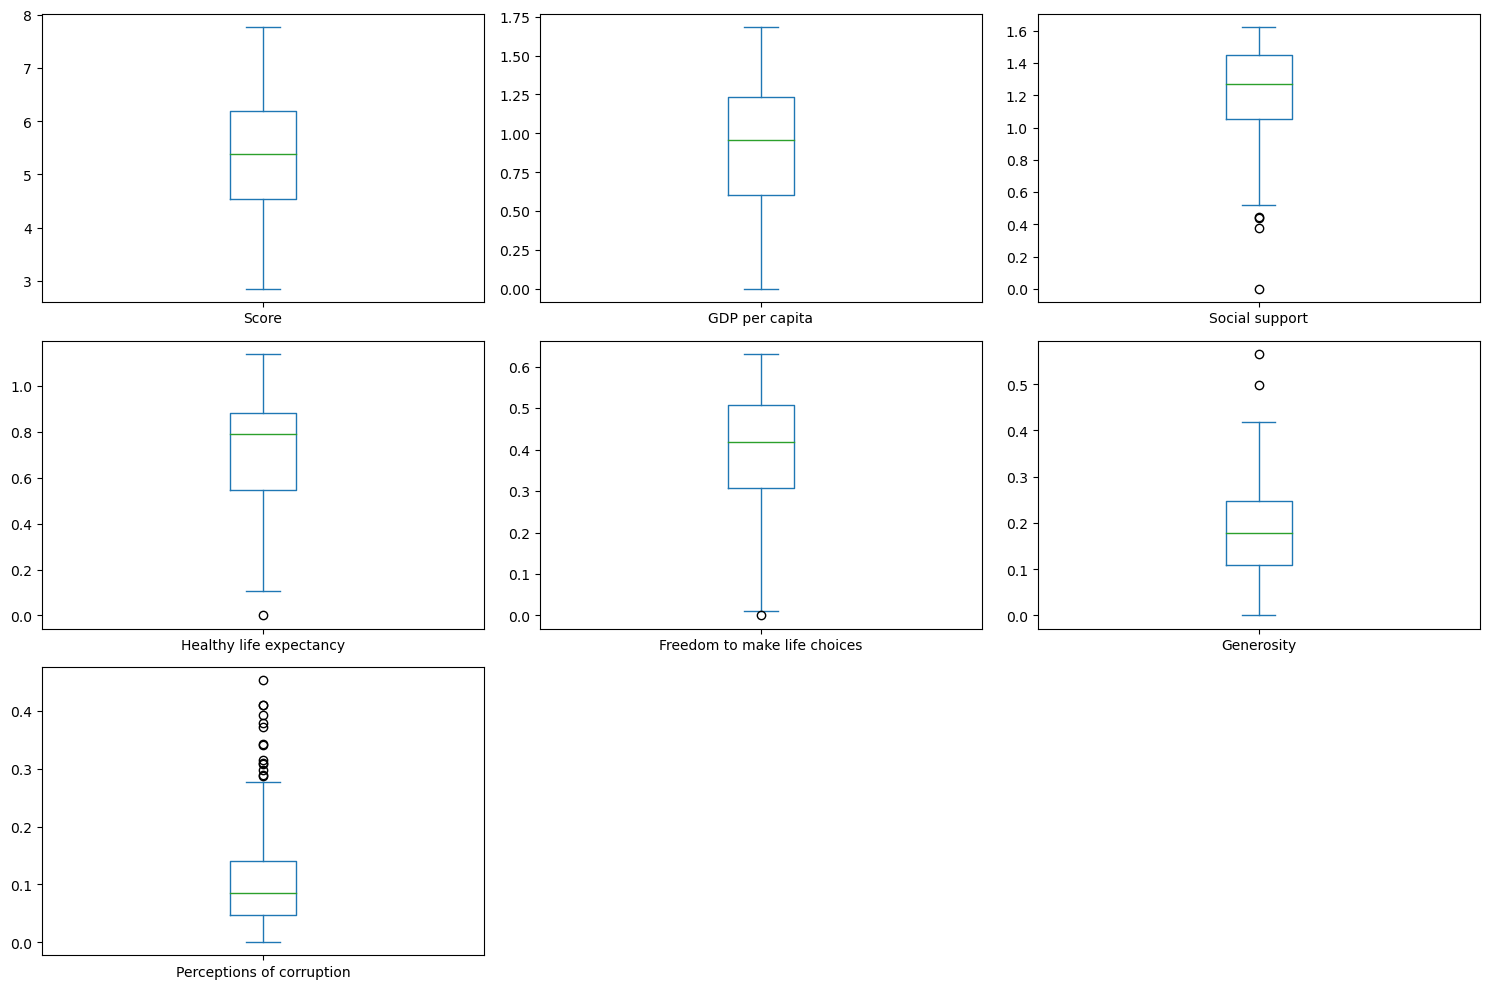

In [7]:
# Box Plots for Outlier Detection.
df.drop(columns='Overall rank').plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10))
plt.tight_layout()
plt.show()

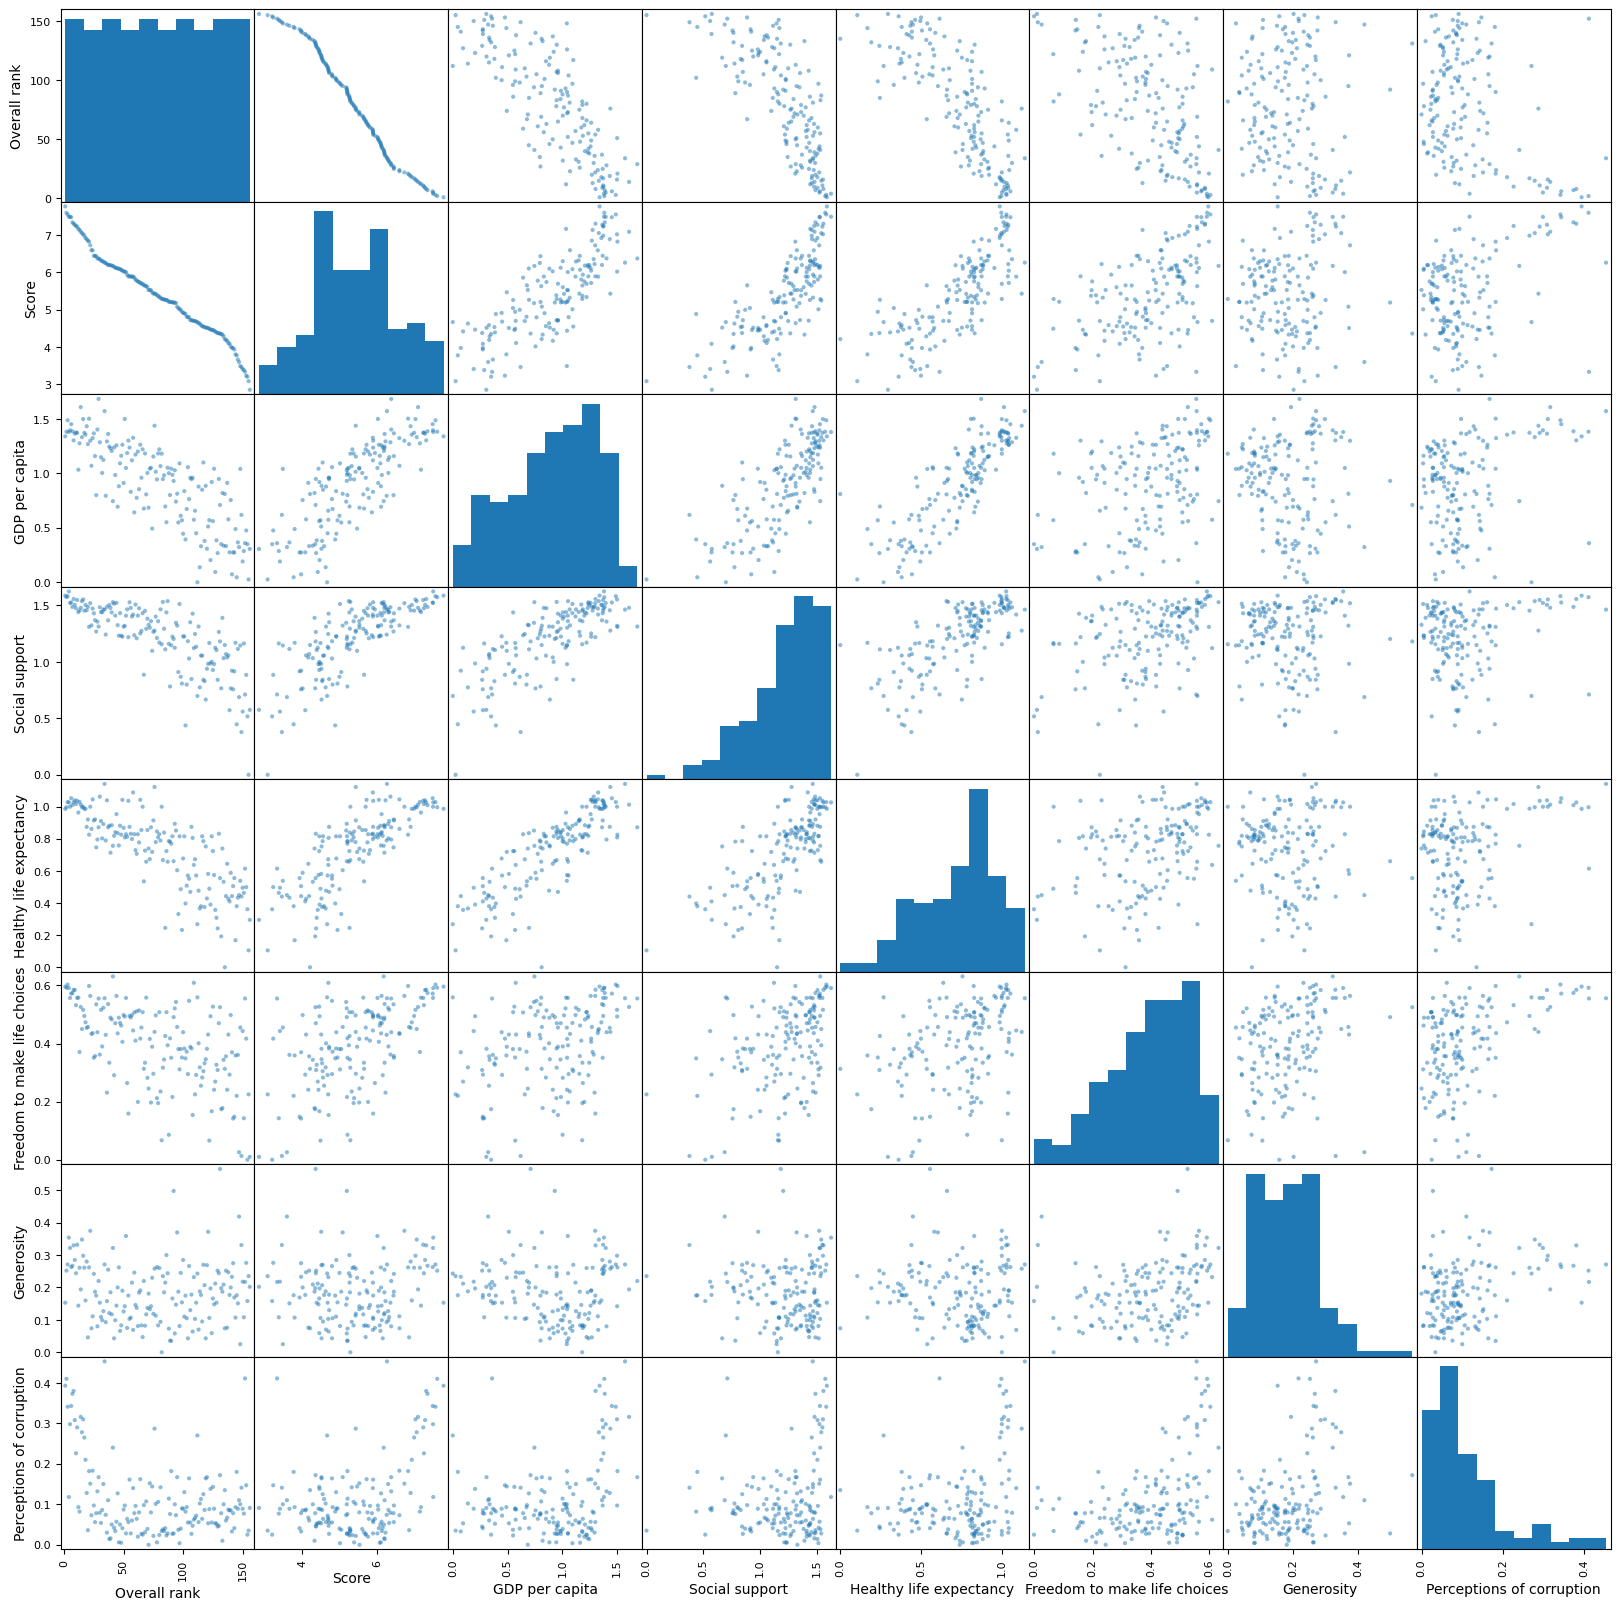

In [8]:
# Scatterplot Matrix.
pd.plotting.scatter_matrix(df, figsize=(20, 20))
plt.show()

### Exploratory Data Analysis - Code Rationalization

### Exploratory Data Analysis - Discussion

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Defines the independent variables (X) and the dependent variable (y).
X = df[['GDP per capita', 'Social support', 'Healthy life expectancy', 
          'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = df['Score']

# Splits the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creates and fits the model.
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the Test set results.
y_pred = model.predict(X_test)

# Calculates the performance metrics.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.4144641383528352
R^2 Score: 0.6017537913445683


  File "C:\Users\Luan\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


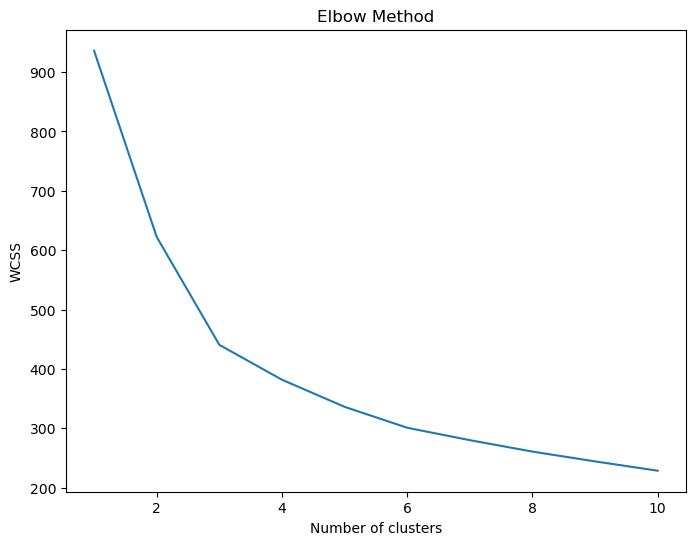

Cluster 0 Countries:
 ['Costa Rica' 'Israel' 'Czech Republic' 'Mexico' 'France' 'Taiwan' 'Chile'
 'Guatemala' 'Saudi Arabia' 'Spain' 'Panama' 'Brazil' 'Uruguay'
 'El Salvador' 'Italy' 'Slovakia' 'Trinidad & Tobago' 'Poland' 'Lithuania'
 'Colombia' 'Slovenia' 'Nicaragua' 'Kosovo' 'Argentina' 'Romania' 'Cyprus'
 'Ecuador' 'Kuwait' 'Latvia' 'South Korea' 'Estonia' 'Jamaica' 'Mauritius'
 'Japan' 'Honduras' 'Kazakhstan' 'Bolivia' 'Hungary' 'Paraguay'
 'Northern Cyprus' 'Peru' 'Portugal' 'Russia' 'Philippines' 'Serbia'
 'Moldova' 'Libya' 'Montenegro' 'Croatia' 'Dominican Republic'
 'Bosnia and Herzegovina' 'Turkey' 'Malaysia' 'Belarus' 'Greece'
 'Mongolia' 'North Macedonia' 'Kyrgyzstan' 'Turkmenistan' 'Algeria'
 'Morocco' 'Azerbaijan' 'Lebanon' 'China' 'Vietnam' 'Bulgaria' 'Jordan'
 'Gabon' 'South Africa' 'Albania' 'Venezuela' 'Palestinian Territories'
 'Namibia' 'Armenia' 'Iran' 'Georgia' 'Tunisia' 'Iraq' 'Sri Lanka'
 'Ukraine' 'Egypt' 'Botswana']
Cluster 1 Countries:
 ['Pakistan' 'Tajikist

In [10]:
import warnings
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

X = df[['GDP per capita', 'Social support', 'Healthy life expectancy', 
          'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

df['Cluster'] = y_kmeans

for cluster in range(optimal_clusters):
    cluster_countries = df[df['Cluster'] == cluster]
    print(f"Cluster {cluster} Countries:\n", cluster_countries['Country or region'].values)
